<a href="https://colab.research.google.com/github/Biky2/CODSOFT/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("yo");

yo


***required all the neccesary dependences***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***dataset importing from the website to test ***

In [ ]:
ds=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
ds.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9938,9939,15593496,Korovin,526,Spain,Female,36,5,91132.18,1,0,0,58111.71,0
1539,1540,15797686,Howard,558,France,Male,38,8,113000.92,1,1,1,152872.39,0
6113,6114,15585867,Rutledge,596,Spain,Male,36,2,0.00,2,0,1,125557.95,0
9139,9140,15779904,Yobanna,597,France,Female,29,5,0.00,2,1,1,174825.57,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0


In [ ]:
ds.shape

(10000, 14)

In [ ]:
ds.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
ds.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
ds["Geography"].unique()
ds["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
def check(value):
  x=value.unique()
  y=value.value_counts()
  print(x)
  print(y)

In [ ]:
file=check(ds["Geography"])
print(file)

['France' 'Spain' 'Germany']
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
None


In [ ]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
ds["RowNumber"]

,RowNumber
0,1
1,2
2,3
3,4
4,5
...,...
9995,9996
9996,9997
9997,9998
9998,9999


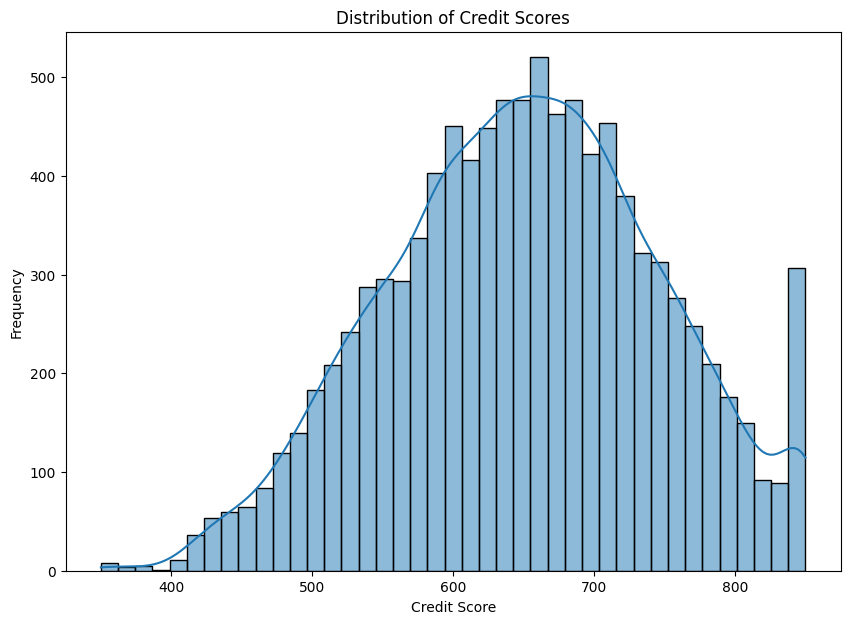

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(ds['CreditScore'], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

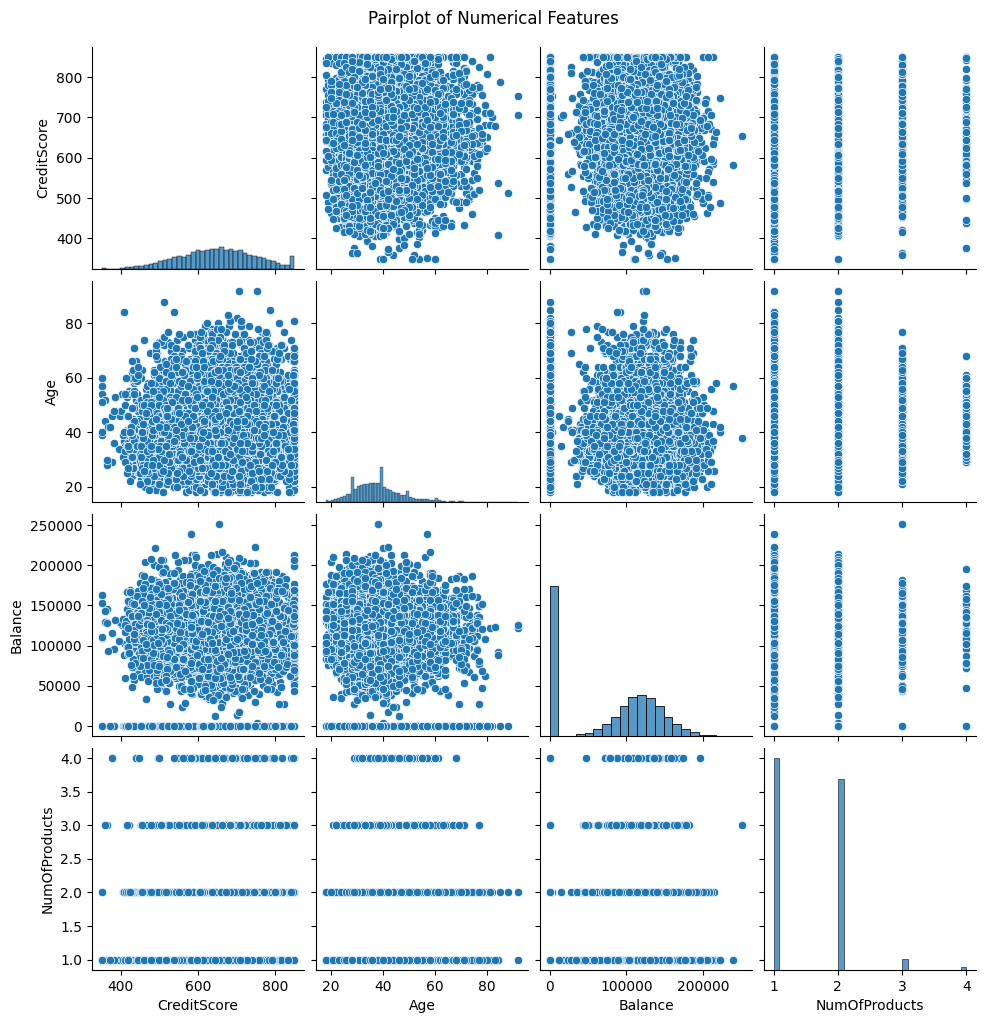

In [ ]:
sns.pairplot(ds[['CreditScore', 'Age', 'Balance', 'NumOfProducts']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

***data pre-processing***

In [ ]:
ds.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
ds

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


encoding


In [ ]:
ds["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)
ds["Geography"].replace({"France":[0],"Germany":[1],"Spain":[2]},inplace=True)

dividing the dataset

In [ ]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=ds.drop(columns=['Exited'])
y=ds['Exited']

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

logistic regression


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr_rs=LogisticRegression()
lr_rs.fit(x_train,y_train)
ŷ_train=lr_rs.predict(x_train)
ŷ_test=lr_rs.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr_rs,x_train,y_train,cv=5).mean())

test_accuracy 0.807125
test_accuracy 0.815
cross_validation 0.8065000000000001


random forest

In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 43}

In [ ]:
rf=RandomForestClassifier(n_estimators=43)
rf.fit(x_train,y_train)

ŷ_train=rf.predict(x_train)
ŷ_test=rf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.999375
test_accuracy 0.8645
CV 0.8591249999999999
